# Sumario <a id='sumario'></a>
- [Sumario](#sumario)    
  - [Objetivo](#objetivo)
      - [O que alcançar e por que?](#alcançar)
      - [Quem se interessa pelo que você produz?](#interessa)
      - [Quais decisões serão baseadas nas suas análises?](#decisoes)


- [Análise exploratória de dados](#analise) 
  - [Bibliotecas](#bibliotecas)
  - [Importação dos dados](#importacao)

  - [Pré-processamento](#pre)
    - [valores ausentes](#ausentes)
    - [substituir os valores ausentes](#substitua)
        - [substituindo custumerID nulos](#Cnulos)
    - [Renomear as colunas para nomes intuitivos e padronizados](#renomar)
    - [Corrigindo valores estranhos](#corrigindo)
    - [Valores duplicados](#duplicatas)
    
  - [Analisando os dados](#analisando)
    - [Propor hipóteses de segmentação e comportamento](#hipoteses)
    - [Criar colunas que achar necessárias ao melhor entendimento](#criar)
     - [Criar coluna preço da compra](#preco)
     - [Criar coluna mês da data do pedido (se necessário)](#mes)
     - [Criar coluna com preco do pedido](#preco2)
     - [criar coluna preco do primeiro pedido](#pedido1)
     - [criar coluna total gasto](#totalg)
     - [criar coluna itens no pedido](#itensp)
     - [criar coluna quantidade de pedidos](#quantidade)
     - [organizar a ordem das colunas](#ordem)
    
  - [Desenhar histograma ou outros gráficos para as colunas mais importantes](#desenhar)
    - [grafico pedido x tempo](#g1)
    - [grafico faturamento x tempo](#g2)
    - [grafico totalpedidos x totalgasto](#g3)

  - [Agrupando os dados](#agrupando)  
    - [filtando](#filtro)  
    - [agrupando por clientes](#agclientes)  
    - [mapa de calor](#mapa)  
     
  - [Separando nos grupos](#grupos)  
    - [padronizando os dados](#padrao)  
    - [aprendizado de maquina](#maquina)  
     - [dendograma](#dendo)
     - [kemans](#kmeans)
     -  [identificando padroes nos agrupamentos formados pela IA](#identificar_padroes)

  - [Filtrando novamente](#novamente)  
  - [dividindo em grupos pelo kmenans novamente](#kmeans2)

  - [como ficou a divisao dos dados?](#divisao)
  - [Conclusoes](#conclusoes)  

## Objetivo <a id='objetivo'></a>


### O que alcançar e por que? <a id='alcançar'></a>
*Vamos trabalhar com dados da Everything Plus uma loja online que vende utensílios domésticos. Diante disto, queremos melhorar as vendas desenvolvendo ofertas mais personalizadas para diferentes usuários por meio de segmentação dos clientes.*



### Quem se interessa pelo que você produz? <a id='interessa'></a>
*A empresa Everything Plus em seu setor de marketing juntamente com o comercial precisa da análise para ser mais precisa em suas escolhas.*



### Quais decisões serão baseadas nas suas análises? <a id='decisoes'></a>
*Que promoções e propagandas serão realizadas e a qual publico serão expostas*


## Analise exploratoria de dados. <a id='analise'></a>
- [Sumario](#sumario)


#### Bibliotecas <a id='bibliotecas'></a>

In [1]:
# Biblioteca para manipulação e análise de dados tabulares
import pandas as pd

# Biblioteca para funções matemáticas
import math as mth

# Biblioteca para lidar com datas e horários
import datetime as dt

# Biblioteca para computação numérica, especialmente em arrays multidimensionais
import numpy as np
from numpy import median  # Importando função específica para calcular a mediana

# Bibliotecas para análise estatística e científica de dados
import scipy.stats as stats
from scipy.stats import percentileofscore
from scipy import stats as st

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go


# Bibliotecas para pré-processamento e modelagem de dados
from sklearn.preprocessing import StandardScaler

# Bibliotecas de agrupamento
from scipy.cluster.hierarchy import dendrogram, ward,linkage

# Bibliotecas de machine learning
from sklearn.cluster import KMeans



### Importacao dos dados <a id='importacao'></a>


In [2]:
caminho='/datasets/ecommerce_dataset_us.csv'
caminho2='ecommerce_dataset_us.csv'

try:
    df=pd.read_csv(caminho, sep='\t',dtype={'StockCode': str}, parse_dates=['InvoiceDate'])
except:
    df=pd.read_csv(caminho2, sep='\t', dtype={'StockCode': str},parse_dates=['InvoiceDate'])

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680.0


## Pre-processamento <a id='pre'></a>
- [Sumario](#sumario)

#### Valores ausentes <a id='ausentes'></a>


In [3]:
#checando colunas
df.info() 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


2 colunas com valores nulos, 3 com numeros tres em texto e uma em datahora

os dados são de compras de produtos em pedidos feitas por usuarios.
é bom saber se há um stockcode para cada produto e também como os valores nulos afetam isso:

In [4]:
df['StockCode'].nunique()

4070

In [5]:
df['Description'].nunique()

4223

valores muito pareceidos, as vezes um mesmo produto é escrito diversas vezes com outra grafia no mesmo numero de estoque, pode ser o caso, vamos continuar a analise.

In [6]:
stoccode_descriptio_nunique=df.groupby('StockCode')['Description'].nunique().sort_values().reset_index()
stoccode_descriptio_nunique

,StockCode,Description
0,47563B,0
1,84899F,0
2,72814,0
3,21431,0
4,17011A,0
...,...,...
4065,85172,5
4066,85175,6
4067,21830,6
4068,23084,7


temos até 8 descrições diferentes para o mesmo numero de estoque, vejamos a media e um ou dois numero de estoque com mais de uma descrição:

In [7]:
stoccode_descriptio_nunique['Description'].mean()

1.1773955773955773

In [8]:
df[df['StockCode'] == '20713' ]['Description'].unique()


array(['JUMBO BAG OWLS', nan, 'wrongly marked. 23343 in box',
       'wrongly coded-23343', 'found', 'Found', 'wrongly marked 23343',
       'Marked as 23343', 'wrongly coded 23343'], dtype=object)

In [9]:
df[df['StockCode'] == '23084' ]['Description'].unique()      

array(['RABBIT NIGHT LIGHT', nan, 'temp adjustment',
       'allocate stock for dotcom orders ta',
       'add stock to allocate online orders', 'for online retail orders',
       'Amazon', 'website fixed'], dtype=object)

 Interpreto que StockCode se refere a um mesmo codigo para um mesmo produto, entretanto no preenchimento da descrição, as vezes há enganos. o campo é alimentado com informações adcionais, as vezes com o nome do produto, como é o correto, e as vezes fica branco.
 temos proximo de 4000 codigos, o que equivale a 4000 produtos diferentes
 
 para tentar tratar os dados na coluna descrição usaremos a moda para identificar o produto dos campos em branco, depois juntaremos as modas como coluna na tabela e trabalaremos com ela. no lugar de description

#### Substitua os valores ausentes <a id='substitua'></a>


In [10]:
# Agrupar os dados pelo 'StockCode' e aplicar a moda na coluna 'Description' de cada grupo
mode_description = df.groupby('StockCode')['Description'].apply(lambda x: x.mode())

# Reiniciar os índices para mesclar os resultados
mode_description=mode_description.reset_index()

In [11]:
mode_description=mode_description.drop('level_1', axis=1)

In [12]:
#trocando o nome da coluna
mode_description.columns=['StockCode','produto']
mode_description

,StockCode,produto
0,10002,INFLATABLE POLITICAL GLOBE
1,10080,GROOVY CACTUS INFLATABLE
2,10120,DOGGY RUBBER
3,10123C,HEARTS WRAPPING TAPE
4,10124A,SPOTS ON RED BOOKCOVER TAPE
...,...,...
3965,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00
3966,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00
3967,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00
3968,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00


In [13]:
# Mesclando os resultados ao DataFrame principal usando 'StockCode' como chave de mesclagem
df = df.merge(mode_description, on='StockCode')

In [14]:
#apagando a coluna original
df.drop('Description', axis=1,inplace=True)
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,produto
0,536365,85123A,6,2018-11-29 08:26:00,2.55,17850.0,WHITE HANGING HEART T-LIGHT HOLDER
1,536373,85123A,6,2018-11-29 09:02:00,2.55,17850.0,WHITE HANGING HEART T-LIGHT HOLDER
2,536375,85123A,6,2018-11-29 09:32:00,2.55,17850.0,WHITE HANGING HEART T-LIGHT HOLDER
3,536390,85123A,64,2018-11-29 10:19:00,2.55,17511.0,WHITE HANGING HEART T-LIGHT HOLDER
4,536394,85123A,32,2018-11-29 10:39:00,2.55,13408.0,WHITE HANGING HEART T-LIGHT HOLDER
...,...,...,...,...,...,...,...
542384,579512,23617,2,2019-11-27 16:47:00,2.91,NaN,SET 10 CARDS SWIRLY XMAS TREE 17104
542385,580691,90214U,12,2019-12-03 15:48:00,0.29,13790.0,"LETTER ""U"" BLING KEY RING"
542386,581238,47591b,1,2019-12-06 10:53:00,4.13,NaN,SCOTTIES CHILDRENS APRON
542387,581483,23843,80995,2019-12-07 09:15:00,2.08,16446.0,"PAPER CRAFT , LITTLE BIRDIE"


pronto, todos os valores de descrição para um mesmo codigo de estoque foram substituidos pela moda do codigo.  
Isso significa que não é mais para ter valores com erros ortograficos, pois presumimos que a moda será o valor corretamente escrito, além disso valores nulos foram preenchidos.  
Agora só resta averiguar se há campos com mais de uma moda.

a seguir, verificamos se ainda há um plural de valores para um mesmo codigo com outro agrupamento em stockcode:

In [15]:
verificandovaloresdeproduto=df.groupby('StockCode')['produto'].nunique().sort_values().reset_index()
listacodigo=verificandovaloresdeproduto[verificandovaloresdeproduto['produto']>1].reset_index()
listacodigo

,index,StockCode,produto
0,3947,35833G,2
1,3948,79323W,2
2,3949,DCGS0069,2
3,3950,84614A,2
4,3951,22900,2
5,3952,84809B,2
6,3953,84743C,2
7,3954,35610B,2
8,3955,23595,2
9,3956,90014C,2


11 codigos possuiam mais de uma moda, o que gerou pluralidade de valores para um mesmo codigo
vamos transformar cada um desses valores a mais no primeiro valor encontrado por meio de transform(first)

In [16]:
dflistacodigo=df[df['StockCode'].isin(listacodigo['StockCode'])]

In [17]:
dflistacodigo['produto'] = dflistacodigo.groupby('StockCode')['produto'].transform('first')
#agora uma verificação nos valores resultantes
dflistacodigo['produto'].unique()


C:\Users\Nair Corso\AppData\Local\Temp\ipykernel_16884\519670362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflistacodigo['produto'] = dflistacodigo.groupby('StockCode')['produto'].transform('first')


array([' SET 2 TEA TOWELS I LOVE LONDON ',
       'PINK BAROQUE FLOCK CANDLE HOLDER', '4 GOLD FLOCK CHRISTMAS BALLS',
       'BLACK CHRISTMAS FLOCK DROPLET ', 'ACRYLIC JEWEL SNOWFLAKE,PINK',
       'Unsaleable, destroyed.', 'OOH LA LA DOGS COLLAR',
       'PINK CHRYSANTHEMUMS ART FLOWER', 'ORANGE FELT VASE + FLOWERS',
       'SILVER AND BLACK ORBIT NECKLACE', 'adjustment'], dtype=object)

deu certo, mas se tem ainda alguns valores inuteis, vamos excluí-los:

In [18]:
#anteriormente fizemos as alterações apenas no dflista, agora faremos no df inteiro:
df['produto'] = df.groupby('StockCode')['produto'].transform('first')
#agora retira-se os dados com valores inuteis:
df = df.drop(df[(df['produto'] == 'Unsaleable, destroyed.') | (df['produto'] == 'adjustment')].index, axis=0)

df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,produto
0,536365,85123A,6,2018-11-29 08:26:00,2.55,17850.0,WHITE HANGING HEART T-LIGHT HOLDER
1,536373,85123A,6,2018-11-29 09:02:00,2.55,17850.0,WHITE HANGING HEART T-LIGHT HOLDER
2,536375,85123A,6,2018-11-29 09:32:00,2.55,17850.0,WHITE HANGING HEART T-LIGHT HOLDER
3,536390,85123A,64,2018-11-29 10:19:00,2.55,17511.0,WHITE HANGING HEART T-LIGHT HOLDER
4,536394,85123A,32,2018-11-29 10:39:00,2.55,13408.0,WHITE HANGING HEART T-LIGHT HOLDER
...,...,...,...,...,...,...,...
542384,579512,23617,2,2019-11-27 16:47:00,2.91,NaN,SET 10 CARDS SWIRLY XMAS TREE 17104
542385,580691,90214U,12,2019-12-03 15:48:00,0.29,13790.0,"LETTER ""U"" BLING KEY RING"
542386,581238,47591b,1,2019-12-06 10:53:00,4.13,NaN,SCOTTIES CHILDRENS APRON
542387,581483,23843,80995,2019-12-07 09:15:00,2.08,16446.0,"PAPER CRAFT , LITTLE BIRDIE"


#### substituindo custumerID nulos: <a id='Cnulos'></a>

para substituir CusomerID, devemos usar InvoiceNo, pois um pedido só deve ser de um unico cliente

In [19]:
df['CustomerID'] = df.groupby('InvoiceNo')['CustomerID'].ffill()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542375 entries, 0 to 542388
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    542375 non-null  object        
 1   StockCode    542375 non-null  object        
 2   Quantity     542375 non-null  int64         
 3   InvoiceDate  542375 non-null  datetime64[ns]
 4   UnitPrice    542375 non-null  float64       
 5   CustomerID   407238 non-null  float64       
 6   produto      542375 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 33.1+ MB


infelizmente não foram erros de preenchimento isolados, mas o proprio cliente que não teve preenchido os dados para o pedido. Não tem como substituir. Ou os dados serão apagados quando formos agrupar tudo por iddocliente.

### Renomear as colunas para nomes intuitivos e padronizados <a id='renomar'></a>


Significado das Colunas:


`InvoiceNo` — identificador de pedido

`StockCode` — identificador de item

`Description` — nome de item

`Quantity`

`InvoiceDate` — data do pedido

`UnitPrice` — preço por item

`CustomerID`

In [20]:
df.rename(columns={
    'InvoiceNo':'numero_pedido',
    'StockCode': 'numero_estoque',
    'Quantity':'quantidade',
    'InvoiceDate':'data_pedido' ,
    'UnitPrice':'preco_unidade',
    'CustomerID':'id_cliente'},inplace=True)

df.sort_values(by='numero_pedido')

,numero_pedido,numero_estoque,quantidade,data_pedido,preco_unidade,id_cliente,produto
0,536365,85123A,6,2018-11-29 08:26:00,2.55,17850.0,WHITE HANGING HEART T-LIGHT HOLDER
2668,536365,84406B,8,2018-11-29 08:26:00,2.75,17850.0,CREAM CUPID HEARTS COAT HANGER
2964,536365,84029G,6,2018-11-29 08:26:00,3.39,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE
3438,536365,84029E,6,2018-11-29 08:26:00,3.39,17850.0,RED WOOLLY HOTTIE WHITE HEART.
3890,536365,22752,2,2018-11-29 08:26:00,7.65,17850.0,SET 7 BABUSHKA NESTING BOXES
...,...,...,...,...,...,...,...
466298,C581490,23144,-11,2019-12-07 09:57:00,0.83,14397.0,ZINC T-LIGHT HOLDER STARS SMALL
300348,C581499,M,-1,2019-12-07 10:28:00,224.69,15498.0,Manual
30583,C581568,21258,-5,2019-12-07 11:57:00,10.95,15311.0,VICTORIAN SEWING BOX LARGE
189270,C581569,20979,-5,2019-12-07 11:58:00,1.25,17315.0,36 PENCILS TUBE RED RETROSPOT


temos muitos valores outliers; os pedidos foram do final de novembro de 2018 ate o inicio de dezembro de 2019; temos valores negativos, o que seria impossivel, temos quase 4000 itens e 25000 pedidos. id_cliente é tratado como numero.
a partir disso é necessário fazer correções como parte do tratamento de dados:


In [21]:
#corrigindo a coluna id_cliente
df['id_cliente']=df['id_cliente'].astype(str)

### Corrigindo valores estranhos: negativos ou nulos <a id='corrigindo'></a>


In [22]:
#preços nulos e negativos
#checando
df[df['preco_unidade']<=0].sort_values(by='preco_unidade')
#excluindo os negativos
df.drop(df[df['preco_unidade']<0].index, axis=0, inplace=True)
#contando os nulos:
df[df['preco_unidade']<=0].sort_values(by='preco_unidade')

,numero_pedido,numero_estoque,quantidade,data_pedido,preco_unidade,id_cliente,produto
231,539856,85123A,1,2018-12-20 14:41:00,0.0,nan,WHITE HANGING HEART T-LIGHT HOLDER
398687,579731,35648,-46,2019-11-28 14:23:00,0.0,nan,VINTAGE BEAD PINK PURSE
398688,579732,35648,-10,2019-11-28 14:24:00,0.0,nan,VINTAGE BEAD PINK PURSE
399029,544396,62094B,-92,2019-02-16 12:16:00,0.0,nan,TURQ ICE CREAM BUM BAG
399220,551327,84228,-4,2019-04-25 16:01:00,0.0,nan,HEN HOUSE W CHICK STANDING
...,...,...,...,...,...,...,...
274363,579733,84581,-41,2019-11-28 14:24:00,0.0,nan,DOG TOY WITH PINK CROCHET SKIRT
274369,581199,84581,-2,2019-12-05 18:26:00,0.0,nan,DOG TOY WITH PINK CROCHET SKIRT
274396,545990,84598,-3000,2019-03-06 13:07:00,0.0,nan,BOYS ALPHABET IRON ON PATCHES
274631,579755,84912B,-14,2019-11-28 14:54:00,0.0,nan,GREEN ROSE WASHBAG


2389 preços nulos, o que isso significa?? seriam produtos gratuitos, trocas, brindes  ou erros de digitação?  
De toda forma não são muito significativos, opta-se pela sua exclusão!

In [23]:
#excluindo os nulos
df=df[~(df['preco_unidade']==0)]
df[df['preco_unidade']<=0].sort_values(by='preco_unidade')

,numero_pedido,numero_estoque,quantidade,data_pedido,preco_unidade,id_cliente,produto


In [24]:
#Repetindo a mesma operação para quantidade
#verificando
df[df['quantidade']<=0].sort_values(by='quantidade')

,numero_pedido,numero_estoque,quantidade,data_pedido,preco_unidade,id_cliente,produto
542388,C581484,23843,-80995,2019-12-07 09:27:00,2.08,16446.0,"PAPER CRAFT , LITTLE BIRDIE"
439808,C541433,23166,-74215,2019-01-16 10:17:00,1.04,12346.0,MEDIUM CERAMIC TOP STORAGE JAR
138430,C536757,84347,-9360,2018-11-30 14:23:00,0.03,15838.0,ROTATING SILVER ANGELS T-LIGHT HLDR
117242,C550456,21108,-3114,2019-04-16 13:08:00,2.10,15749.0,FAIRY CAKE FLANNEL ASSORTED COLOUR
52655,C550456,21175,-2000,2019-04-16 13:08:00,1.85,15749.0,GIN + TONIC DIET METAL SIGN
...,...,...,...,...,...,...,...
263548,C557664,22847,-1,2019-06-19 18:00:00,14.95,nan,BREAD BIN DINER STYLE IVORY
263523,C555860,22847,-1,2019-06-05 14:24:00,16.95,16763.0,BREAD BIN DINER STYLE IVORY
263510,C554690,22847,-1,2019-05-23 16:56:00,16.95,16871.0,BREAD BIN DINER STYLE IVORY
263491,C553924,22847,-1,2019-05-18 09:34:00,14.95,12476.0,BREAD BIN DINER STYLE IVORY


10 mil valores negativos, acredito que sejam erros, portanto multiplicarei por -1

In [25]:
caminho='/datasets/ecommerce_dataset_us.csv'
caminho2='ecommerce_dataset_us.csv'

try:
    dfreembolso=pd.read_csv(caminho, sep='\t',dtype={'StockCode': str}, parse_dates=['InvoiceDate'])
except:
    dfreembolso=pd.read_csv(caminho2, sep='\t', dtype={'StockCode': str},parse_dates=['InvoiceDate'])

In [26]:
dfreembolso[dfreembolso['Quantity']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527.0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311.0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548.0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0
...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2019-12-07 09:57:00,0.83,14397.0
541541,C581499,M,Manual,-1,2019-12-07 10:28:00,224.69,15498.0
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2019-12-07 11:57:00,10.95,15311.0
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2019-12-07 11:58:00,1.25,17315.0


em um teste, a hipotese de pedido de estorno ja falhou, vejamos se pelo menos os valores negativos correspondem a uma compra positiva do mesmo produto e cliente

primeiro checa-se a equivalencia:

In [27]:
#vamos começar por amostragem:
dfreembolso[dfreembolso['CustomerID']==14397.0].sort_values(by='Quantity')
dfreembolso[dfreembolso['CustomerID'] == 17315.0].sort_values(by='Quantity')
dfreembolso[(dfreembolso['CustomerID'] == 17315.0) & (dfreembolso['Description'] == 'DAIRY MAID STRIPE MUG')].sort_values(by='Quantity')
dfreembolso[(dfreembolso['CustomerID'] == 17315.0) & (dfreembolso['Description'] == '36 PENCILS TUBE RED RETROSPOT')].sort_values(by='Quantity')
dfreembolso[dfreembolso['CustomerID'] == 17548.0].sort_values(by='Quantity') 
# parece estar condizente com a hipotese

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2018-11-29 10:24:00,1.65,17548.0
177224,C552049,22585,PACK OF 6 BIRDY GIFT TAGS,-24,2019-05-04 10:00:00,1.25,17548.0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548.0
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2018-11-29 10:24:00,3.45,17548.0
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2018-11-29 10:24:00,1.65,17548.0
177225,C552049,22082,RIBBON REEL STRIPES DESIGN,-10,2019-05-04 10:00:00,1.65,17548.0
177227,C552049,22079,RIBBON REEL HEARTS DESIGN,-10,2019-05-04 10:00:00,1.65,17548.0


de fato, por amostragem não consegui rejeitar minha hipotese de que trata-se de reembolso, inclusive os unicos valores que não obtiveram correspondencias são os que foram registrado em data muito proxima do inicio da coleta de dados, o que indica, se for verdade a hipotese de reembolso, que a empresa já funcionava antes de começar a coletar dados e que os clientes podem ou nao serem clientes novos.

diante disto, não modificarei os dados

#### verificando a relação produto - numero de estoque:

In [28]:
#agrupando por numero de estoque
x=df.groupby('numero_estoque')['produto'].max().reset_index()
x.groupby('produto').count().sort_values(by='numero_estoque' , ascending=False)
df = df[~(df['produto'] == 'thrown away')]
df[df['produto']== 'thrown away']

df = df[~(df['produto'] == 'ebay')]
df[df['produto']== 'ebay']


,numero_pedido,numero_estoque,quantidade,data_pedido,preco_unidade,id_cliente,produto


tem-se alguns produtos com mais de um numero de estoque

#### Valores duplicados <a id='duplicatas'></a>


In [29]:
#identificando
df.duplicated().sum()

5843

In [30]:
df[df.duplicated()]

,numero_pedido,numero_estoque,quantidade,data_pedido,preco_unidade,id_cliente,produto
305,540953,85123A,1,2019-01-10 13:16:00,2.95,14587.0,WHITE HANGING HEART T-LIGHT HOLDER
349,541660,85123A,3,2019-01-18 12:20:00,2.95,17787.0,WHITE HANGING HEART T-LIGHT HOLDER
381,542239,85123A,2,2019-01-24 14:35:00,2.95,17786.0,WHITE HANGING HEART T-LIGHT HOLDER
1401,560385,85123A,1,2019-07-16 12:53:00,2.95,14583.0,WHITE HANGING HEART T-LIGHT HOLDER
1410,560555,85123A,1,2019-07-17 13:01:00,2.95,14178.0,WHITE HANGING HEART T-LIGHT HOLDER
...,...,...,...,...,...,...,...
542168,581237,23498,1,2019-12-06 10:40:00,1.45,15443.0,CLASSIC BICYCLE CLIPS
542200,579145,23580,1,2019-11-26 13:13:00,1.95,14597.0,SNACK TRAY HAPPY FOREST
542279,581134,23560,1,2019-12-05 13:12:00,2.89,16368.0,SET OF 6 RIBBONS COUNTRY STYLE
542327,579387,23562,1,2019-11-27 12:06:00,2.89,14452.0,SET OF 6 RIBBONS PERFECTLY PRETTY


temos valores duplicados, analizamos não só os ids e produtos, mas também o exato minuto da compra. Não sei como os dados foram coletados, ou o carrinho formado, pois por um lado é possivel que se tenha incluido duas ou mais vezes um mesmo 'pacote' de produtos, por outro pode ter sido apenas erro mesmo. não são valores muito expressivos apenas 5800, então eliminaremos os dado,  por via das duvidas.

# Analisando os dados <a id='analisando'></a>
- [Sumario](#sumario)

In [31]:
df['produto'].nunique()

3811

pela quantidade de produtos unicos é impraticavel verificar tudo e categorizá-los.

## Propor hipoteses de segmentacao e comportamento <a id='hipoteses'></a>



1 talvez a data de compra tenha alguma influencia no comportamento do cliente, pois as vezes os cliente só compra em datas festivas para dar de presente;
2 talvez os clientes tenham a tendencia a comprar produtos da mesma categoria, pois sequer conhecem os de outras categorias na mesma loja, ou não confiam
3 O preço do produto pode dizer muita coisa sobre o tipo de cliente. alguns clientes podem ter a preferencia de comprar produtos caros enquanto outros produtos mais baratos
4 a quantidade de itens por compra pode dizer muito sobre o cliente, alguns preferem compras menores outros preferem evitar pagar muito frete 
5 quantidade de itens/ o valor do carrinho na primeira compra pode dizer muito sobre o cliente, se ele é desconfiado ou nao.

## Criar colunas que achar necessarias ao melhor entendimento <a id='criar'></a>


### Criar coluna preco da compra <a id='preco'></a>


In [32]:
df['preco_da_compra']=df['preco_unidade']*df['quantidade']
df

,numero_pedido,numero_estoque,quantidade,data_pedido,preco_unidade,id_cliente,produto,preco_da_compra
0,536365,85123A,6,2018-11-29 08:26:00,2.55,17850.0,WHITE HANGING HEART T-LIGHT HOLDER,15.30
1,536373,85123A,6,2018-11-29 09:02:00,2.55,17850.0,WHITE HANGING HEART T-LIGHT HOLDER,15.30
2,536375,85123A,6,2018-11-29 09:32:00,2.55,17850.0,WHITE HANGING HEART T-LIGHT HOLDER,15.30
3,536390,85123A,64,2018-11-29 10:19:00,2.55,17511.0,WHITE HANGING HEART T-LIGHT HOLDER,163.20
4,536394,85123A,32,2018-11-29 10:39:00,2.55,13408.0,WHITE HANGING HEART T-LIGHT HOLDER,81.60
...,...,...,...,...,...,...,...,...
542384,579512,23617,2,2019-11-27 16:47:00,2.91,nan,SET 10 CARDS SWIRLY XMAS TREE 17104,5.82
542385,580691,90214U,12,2019-12-03 15:48:00,0.29,13790.0,"LETTER ""U"" BLING KEY RING",3.48
542386,581238,47591b,1,2019-12-06 10:53:00,4.13,nan,SCOTTIES CHILDRENS APRON,4.13
542387,581483,23843,80995,2019-12-07 09:15:00,2.08,16446.0,"PAPER CRAFT , LITTLE BIRDIE",168469.60


### Criar coluna mes da data do pedido (se necessario) <a id='mes'></a>


In [33]:
df['mes']=df['data_pedido'].dt.month


### criar coluna da data do primeiro pedido <a id='mes1'></a>

In [34]:
precodecompra=df.groupby('numero_pedido')['preco_da_compra'].sum().reset_index()


In [35]:
primeiropedido=df.groupby('id_cliente')['data_pedido'].min().reset_index()
primeiropedido.columns=['id_cliente','data_primeiro_pedido']
df=df.merge(primeiropedido, on='id_cliente' )


### criar coluna preco do pedido <a id='preco2'></a>

In [36]:
preco_do_pedido=df.groupby('numero_pedido')['preco_da_compra'].sum().reset_index()
preco_do_pedido.columns=['numero_pedido','preco_do_pedido']
df=df.merge(preco_do_pedido, on='numero_pedido' )


### criar coluna preco do primeiro pedido <a id='preco1'></a>

In [37]:
x = df.sort_values(by='data_primeiro_pedido')
#como está ordenado pela data do primeiro pedido, quando for agrupado por pedido, o primeiro a aparecer será cronologicamente o primeiro pedido
# agrupar os dados pelo número do pedido e selecionar apenas o primeiro pedido de cada grupo
primeiros_pedidos = x.groupby('id_cliente')['preco_do_pedido'].first()
primeiros_pedidos=primeiros_pedidos.reset_index()


In [38]:

primeiros_pedidos=primeiros_pedidos[['id_cliente','preco_do_pedido']]
primeiros_pedidos.columns=['id_cliente', 'valor_1o_pedido']
#agora é juntar ao df principal:
df=df.merge(primeiros_pedidos,on='id_cliente')


### criar coluna total_gasto <a id='totalg'></a>

In [39]:
dfValorTotal=df.groupby('id_cliente').agg({'valor_1o_pedido':'max', 'preco_da_compra':'sum'}).reset_index()
dfValorTotal=dfValorTotal.rename(columns={'preco_da_compra':'total_gasto'})
dfValorTotal
df= df.merge(dfValorTotal[['id_cliente','total_gasto']], on='id_cliente' )


### criar coluna quantidade de itens no pedidos <a id='itensp'></a>

In [40]:

dfquantidade=df.groupby('numero_pedido').agg({'quantidade':'sum'}).reset_index()
dfquantidade=dfquantidade.rename(columns={'quantidade':'items_totais_no_pedido'})
dfquantidade
df= df.merge(dfquantidade[['numero_pedido','items_totais_no_pedido']], on='numero_pedido' )


### criar coluna quantidade de pedidos <a id='quantidade'></a>

In [41]:
dfquantidade=df.groupby('id_cliente').agg({'numero_pedido':'nunique'}).reset_index()
dfquantidade=dfquantidade.rename(columns={'numero_pedido':'pedidos_por_usuario'})
dfquantidade
df= df.merge(dfquantidade[['id_cliente','pedidos_por_usuario']], on='id_cliente' )


#### organizar a ordem das colunas <a id='ordem'></a>

In [42]:
# Lista de nomes de colunas na nova ordem desejada
nova_ordem = ['id_cliente', 'numero_pedido','numero_estoque','data_pedido','mes','data_primeiro_pedido','produto','quantidade', 'preco_unidade','preco_da_compra','items_totais_no_pedido','preco_do_pedido','valor_1o_pedido','pedidos_por_usuario','total_gasto']

# Reindexar o DataFrame com a nova ordem de colunas
df= df[nova_ordem]


## Desenhar histograma ou outros graficos para as colunas mais importantes <a id='desenhar'></a>

- [Sumario](#sumario)    


In [43]:
print('preco_unidade',df['preco_unidade'].quantile(0.99))
print('quantidade',df['quantidade'].quantile(0.99))
print('preco_da_compra',df['preco_da_compra'].quantile(0.99))
print('preco_da_compra',df['preco_da_compra'].quantile(0.01))
print('quantidade',df['quantidade'].quantile(0.01))



preco_unidade 18.0
quantidade 100.0
preco_da_compra 180.0
preco_da_compra -6.6
quantidade -1.0


In [44]:
dffiltrada=df[df['preco_unidade']<19]

In [45]:
dffiltrada=dffiltrada[dffiltrada['quantidade']<=50.0]

In [46]:
dffiltrada=dffiltrada[dffiltrada['quantidade']>0]

In [47]:
dffiltrada=dffiltrada[dffiltrada['preco_da_compra']>0]

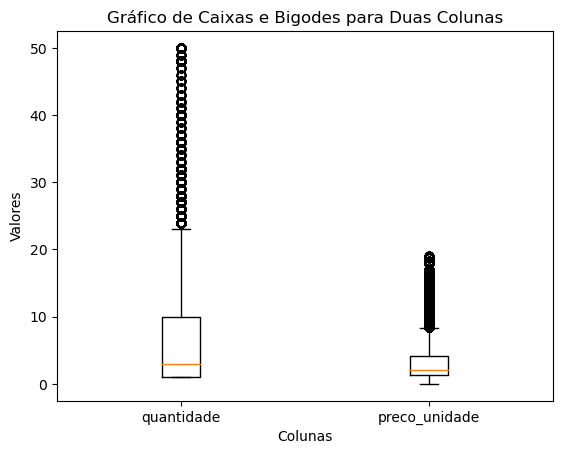

In [48]:
plt.boxplot([dffiltrada['quantidade'], dffiltrada['preco_unidade']])

# Adicionando rótulos aos eixos
plt.xlabel('Colunas')
plt.ylabel('Valores')

# Adicionando título ao gráfico
plt.title('Gráfico de Caixas e Bigodes para Duas Colunas')

# Definindo os rótulos dos ticks no eixo x
plt.xticks([1, 2], ['quantidade', 'preco_unidade'])

# Mostrando o gráfico
plt.show()

In [49]:
df['preco_unidade'].mean()

4.672645196298306

em geral se vende a preços baixos 4.5 dolares e quantidades baixas, até 10 unidades de cada item. Dessa forma parece mais dificil identificar como uma loja de atacado.

In [50]:
print(df['preco_do_pedido'].quantile(0.95))
print(df['preco_do_pedido'].quantile(0.001))


5533.16
-1096.14


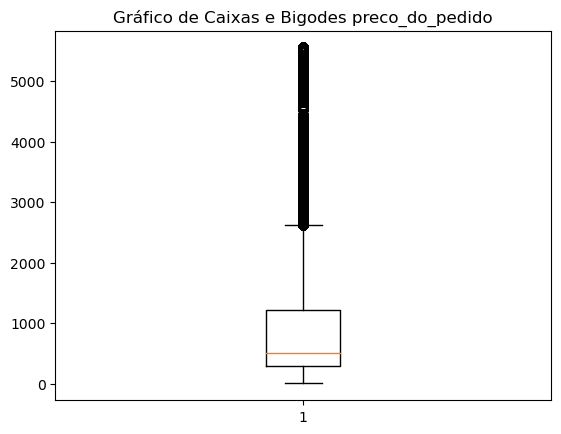

In [51]:
preco_do_pedido=df[df['preco_do_pedido']<5590.67]
preco_do_pedido=preco_do_pedido[preco_do_pedido['preco_do_pedido']>0]

plt.boxplot(preco_do_pedido['preco_do_pedido'])


# Adicionando título ao gráfico
plt.title('Gráfico de Caixas e Bigodes preco_do_pedido')

# Mostrando o gráfico
plt.show()

apesar do baixo valor e das quantidades baixas por unidade, temos valores de pedidos bem elevado, inclusive cheios de outliers

graficos sobre preco do pedido e das unidades

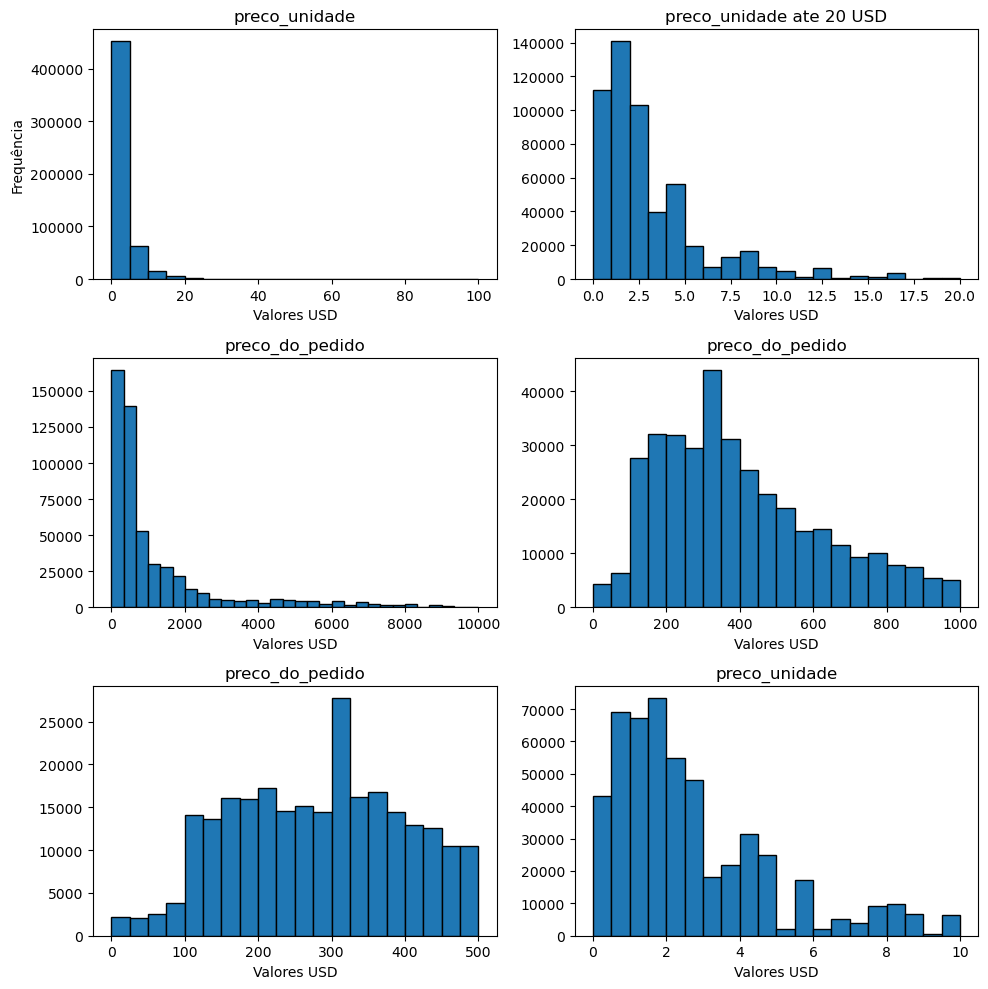

In [52]:
#6 graficos em 2 colunas:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

#unidade
axs[0,0].hist(df['preco_unidade'], bins=20, edgecolor='black',range=(0, 100)) 

axs[0,0].set_title('preco_unidade')
axs[0,0].set_xlabel('Valores USD')
axs[0,0].set_ylabel('Frequência')


axs[0,1].hist(df['preco_unidade'], bins=20, edgecolor='black',range=(0, 20)) 

axs[0,1].set_title('preco_unidade ate 20 USD')
axs[0,1].set_xlabel('Valores USD')

#pedido
axs[1,0].hist(df['preco_do_pedido'], bins=30, edgecolor='black',range=(0, 10000))

axs[1,0].set_title('preco_do_pedido')
axs[1,0].set_xlabel('Valores USD')


axs[1,1].hist(df['preco_do_pedido'], bins=20, edgecolor='black',range=(0, 1000))

axs[1,1].set_title('preco_do_pedido')
axs[1,1].set_xlabel('Valores USD')


axs[2,0].hist(df['preco_do_pedido'], bins=20, edgecolor='black',range=(0, 500))

axs[2,0].set_title('preco_do_pedido')
axs[2,0].set_xlabel('Valores USD')

#unidade
axs[2,1].hist(df['preco_unidade'], bins=20, edgecolor='black',range=(0, 10))

axs[2,1].set_title('preco_unidade')
axs[2,1].set_xlabel('Valores USD')


# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os histogramas
plt.show()

surpreendentemente as compras são em torno de 500 dolares, quase sempre acima de 100 dolares e em quantidade expressiva até a marca de 2000 dolares, além dos muitos outliers. Apesar disso, os itens individuais, na esmagadora maioria (mais de 95%), custam abaixo de 10 dolares. Isso implica em um comportamento dos clientes preferindo compras volumosas. 
O que até faz sentido se levarmos em consideração a necessidade de pagar frete em compras onlines.
Entretanto a maioria dos itens da loja são de valor baixo, talvez seja uma loja que vende no atacado?

Além disso, temos um pico nas compras de 300 dolares, por que será? a depender do país alguns impostos incidem apenas a partir de determinado valor. essa pode ser a causa.  

#### grafico de pedidos no tempo <a id='g1'></a>

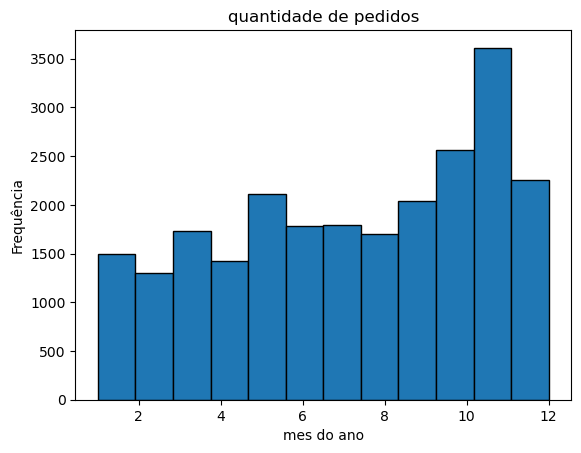

In [53]:
dfpedidotempo=df.groupby('numero_pedido')['mes'].min().reset_index()
plt.hist(dfpedidotempo['mes'], bins=12, edgecolor='black') 

plt.title('quantidade de pedidos')
plt.xlabel('mes do ano')
plt.ylabel('Frequência')
plt.show()

a maioria das compras foram em novembro, em dezembro as vendas caem muito. Temos que lembrar que em novembro temos o fenomeno da black friday nos EUA. Esse evento pode ter elevado as vendas.

#### grafico de faturamento no tempo <a id='g2'></a>

<Axes: xlabel='mes'>

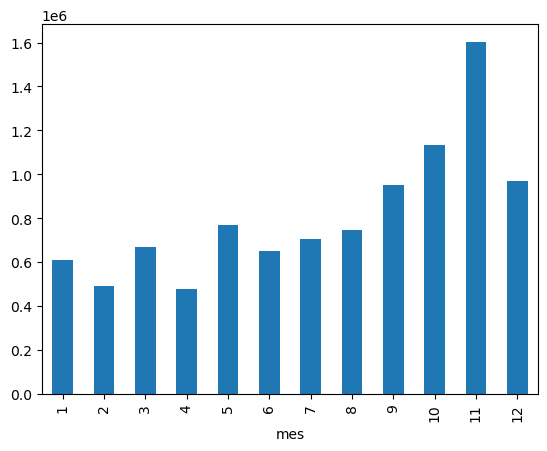

In [54]:
barra=df.groupby('mes')['preco_da_compra'].sum()
barra.plot(kind='bar')

as vendas crescem gradativamente até novembro, quando atigem seu pico de 1.600.000 dolares em um mês. Já em dezembro as vendas caem consideravelmente.

Talvez seja interessante identificarmos a relação do valor do primeiro pedido com o histórico de compras do cliente.  
Será que os primeiros pedidos já dizem muito sobre o quanto o cliente está disposto a gastar?

<Figure size 640x480 with 0 Axes>

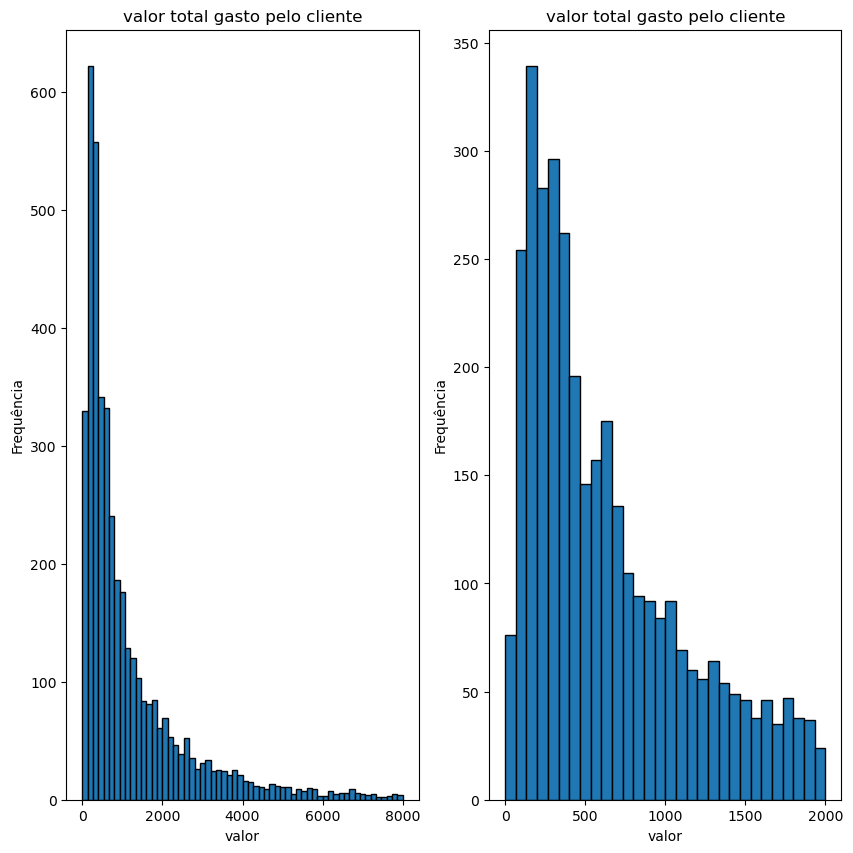

In [55]:
#criando o grafico
#armazenando a 'lista de valores'
y = dfValorTotal['total_gasto']

#limpando as figuras anteriores
plt.clf()

#indicando a quantidade de graficos
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

#configurando o primeiro grafico mais geral
axs[0].hist(y, bins=60, edgecolor='black', range=(0,8000)) 

axs[0].set_title('valor total gasto pelo cliente')
axs[0].set_xlabel('valor')
axs[0].set_ylabel('Frequência')

#configurando o segundo grafico mais especifico
axs[1].hist(y, bins=30, edgecolor='black', range=(0,2000)) 

axs[1].set_title('valor total gasto pelo cliente')
axs[1].set_xlabel('valor')
axs[1].set_ylabel('Frequência')

plt.show()

a maioria dos clientes gastam um total abaixo de 2000, entretanto até 6000 ainda tem uma quantidade consideravel de clientes.  
Como já dito, é interessante notar os altos valores dos gastos por cliente, apensar do baixo valor individual dos itens.
Tem-se uma grande parcela de clientes que compraram menos de 500 dolares.


<Figure size 640x480 with 0 Axes>

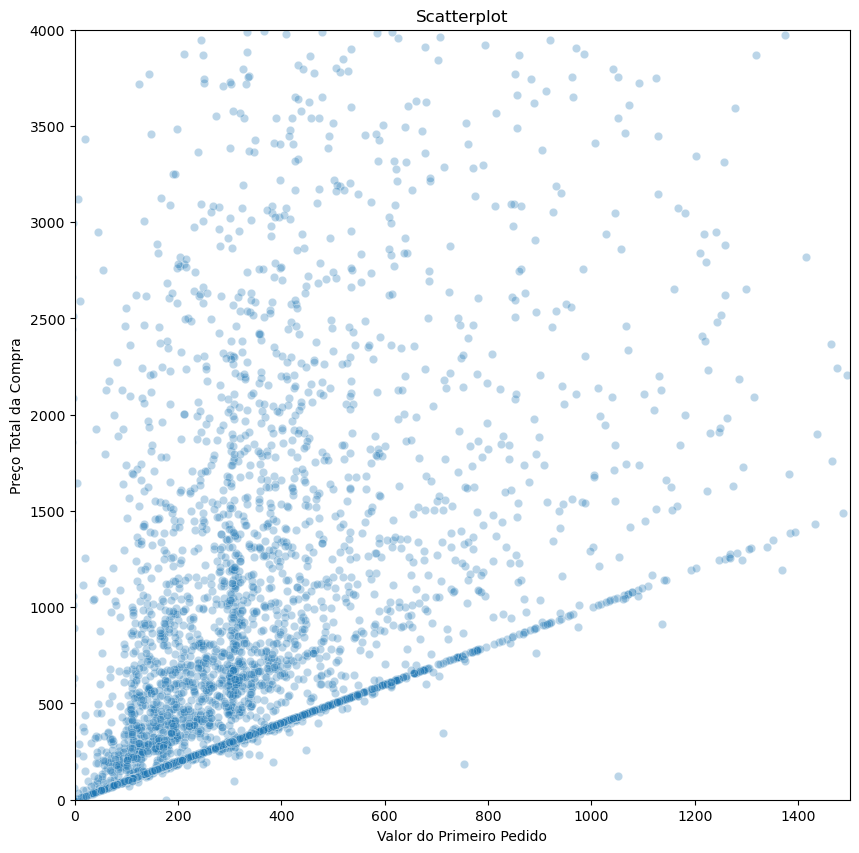

In [56]:
# Definir os dados
x = dfValorTotal['valor_1o_pedido']
y = dfValorTotal['total_gasto']

# Definir os valores máximos para x e y

max_x = 1500  #  valor máximo para x
max_y = 4000  #  valor máximo para y

plt.clf() # limpando as figuras anteriores

# gráfico um abaixo do outro
plt.figure(figsize=(10, 10))

# Scatterplot
sns.scatterplot(x=x, y=y,alpha=0.3)
plt.xlabel('Valor do Primeiro Pedido')
plt.ylabel('Preço Total da Compra')
plt.title('Scatterplot')
plt.xlim(0, max_x)  # limite máximo para o eixo x
plt.ylim(0, max_y)  # limite máximo para o eixo y


plt.show()


temos uma certa relação do primeiro pedido com o valor total pago, mas muito se deve pelos que so compram uma vez. Temos muitos comprando 300 dolares pela primeira vez e se fidelizando com a empresa. O que foi isso? uma promoção?

<Figure size 640x480 with 0 Axes>

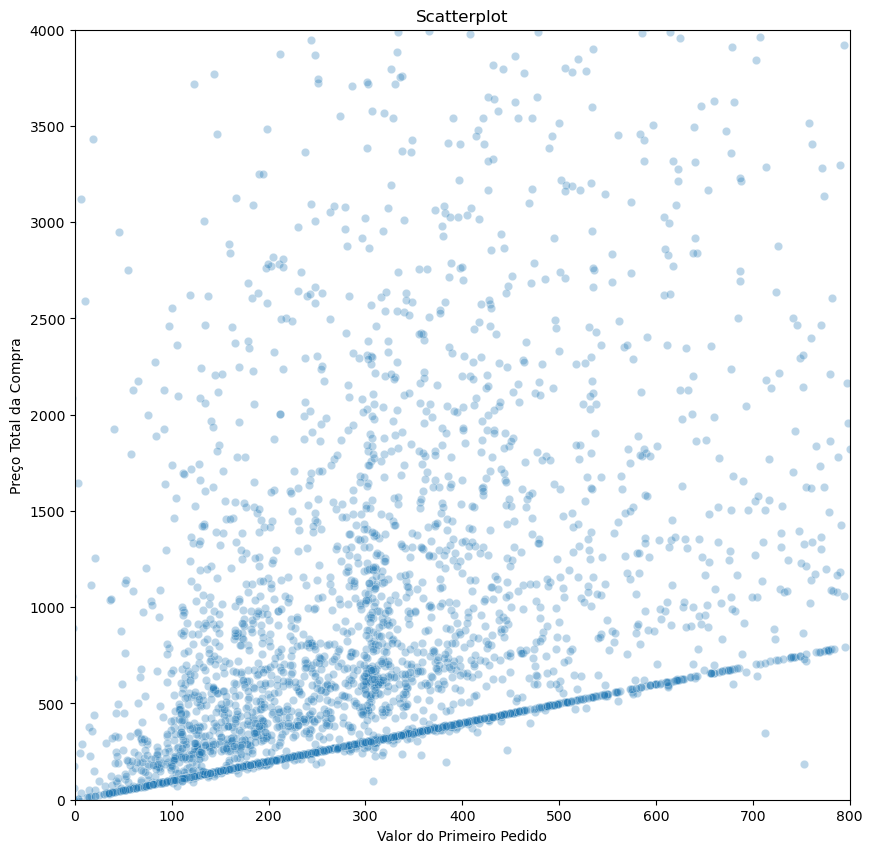

In [57]:
# Definir os dados
x = dfValorTotal['valor_1o_pedido']
y = dfValorTotal['total_gasto']

# Definir os valores máximos para x e y

max_x = 800  #  valor máximo para x
max_y = 4000  #  valor máximo para y

plt.clf() # limpando as figuras anteriores

# gráfico um abaixo do outro
plt.figure(figsize=(10, 10))

# Scatterplot
sns.scatterplot(x=x, y=y,alpha=0.3)
plt.xlabel('Valor do Primeiro Pedido')
plt.ylabel('Preço Total da Compra')
plt.title('Scatterplot')
plt.xlim(0, max_x)  # limite máximo para o eixo x
plt.ylim(0, max_y)  # limite máximo para o eixo y

'''sns.jointplot(x=x, y=y, kind="hist", color="#4CB391", xlim=(0, 800), ylim=(0, 2000))
plt.show()'''

plt.show()


dando um 'zoom' se confirma o que havia-se formulado anteriormente

Temos muitas pessoas realizando o primeiro pedido num valor de 300 dolares. talvez uma promoção bem sucedida, ou padrão de frete, um desconto na primeira compra, não sei o que houve, mas sei que foi efetivo.
temos também que abaixo disso, muitos clientes sequer chegaram a gastar 1000 dolares naquele ano.

#### grafico de total de pedidos por total gasto <a id='g3'></a>

<Figure size 640x480 with 0 Axes>

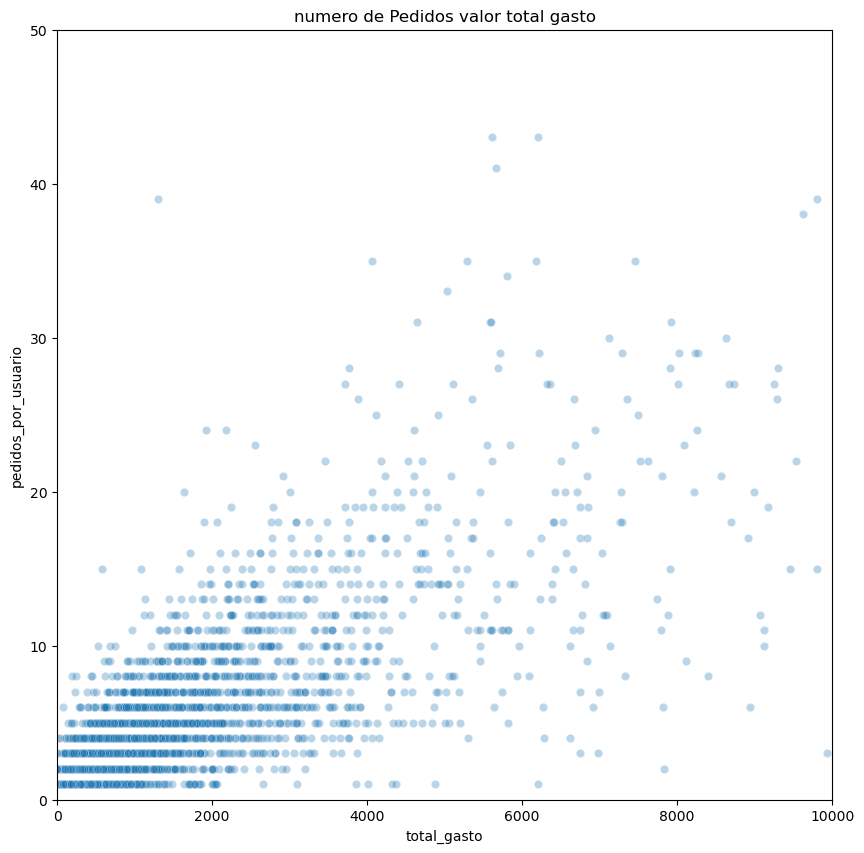

In [58]:
cor=df.groupby('id_cliente').agg({'pedidos_por_usuario':'max', 'total_gasto':'max'})
cor=cor.reset_index()
x=cor['total_gasto']
y=cor['pedidos_por_usuario']
plt.clf() # limpando as figuras anteriores

# gráfico um abaixo do outro
plt.figure(figsize=(10, 10))

# Scatterplot
sns.scatterplot(x=x, y=y,alpha=0.3)
plt.xlabel('total_gasto')
plt.ylabel('pedidos_por_usuario')
plt.title('numero de Pedidos valor total gasto')

plt.xlim(0, 10000)  # limite máximo para o eixo x
plt.ylim(0, 50)  # limite máximo para o eixo y

plt.show()


em uma relação bem forte a quantidade de pedidos influencia muito, alem disso acima de 13 pedidos já não se tem muitos usuarios

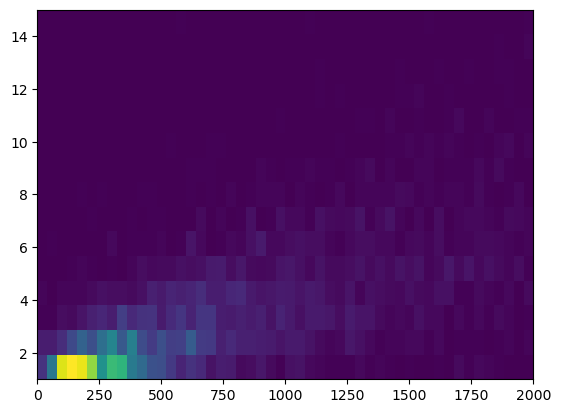

In [59]:
fig, ax = plt.subplots()

ax.hist2d(x, y, bins=[50, 15], range=[[0, 2000], [1, 15]], density=True)

plt.show()

muitos usuarios fazem poucos pedidos e gastam muito pouco.

## Agrupando os dados por cliente e filtrando <a id='agrupando'></a>
- [Sumario](#sumario)

### Filtrando os dados <a id='filtro'></a>

antes de mais nada, entendo por bem eliminar outliers antes de normalizar os dados para a divisão com auxilio de I.A.

In [60]:
print('preco_unidade',df['preco_unidade'].quantile(0.99))
print('quantidade',df['quantidade'].quantile(0.99))
print('preco_da_compra',df['preco_da_compra'].quantile(0.99))


preco_unidade 18.0
quantidade 100.0
preco_da_compra 180.0


In [61]:
dff=df[df['preco_unidade']<18.0]
dff=df[df['quantidade']<100.0]
dff=df[df['preco_da_compra']<196.7975]

In [62]:
dfc=dff[~(dff['id_cliente'].isnull())]
       

infelizmente temos muitos clientes cujo valor é a string 'nan', não dá para trabalhar com esses dados, vamos retira-los

In [63]:
dfc=dfc[~(dfc['id_cliente']=='nan')]

In [64]:
print(df.shape,dfc.shape)
397186 /534126

(539969, 15) (403038, 15)


0.7436185469346184

nossos dados minguaram para 391141 linhas, o que representa apenas 74% do original, mas não tem como trabalhar com justamente o id do cliente ausente.

### agrupando os dados por cliente e por pedido <a id='agclientes'></a>

In [65]:
dfgroupbycliente=dfc.groupby('id_cliente').agg({'quantidade':'mean','items_totais_no_pedido':'mean', 'preco_unidade':'mean', 'preco_do_pedido':'mean','numero_pedido':'nunique', 'valor_1o_pedido':'max', 'total_gasto':'max', })
# renomeando colunas para valores mais intuitivos

dfgroupbycliente.rename(columns={'quantidade':'media_de_unidades', 'preco_unidade': 'preco_medio_da_unidade','preco_do_pedido':'valor_do_pedido_media','numero_pedido':'n_de_pedidos','items_totais_no_pedido':'media_de_itens_no_pedido'}, inplace=True)
dfgroupbycliente=dfgroupbycliente.reset_index()
dfgroupbycliente

,id_cliente,media_de_unidades,media_de_itens_no_pedido,preco_medio_da_unidade,valor_do_pedido_media,n_de_pedidos,valor_1o_pedido,total_gasto
0,12346.0,-74215.000000,-74215.000000,1.040000,-77183.600000,1,-77183.60,0.00
1,12347.0,12.254144,406.845304,2.652873,737.817624,7,711.79,4310.00
2,12348.0,77.833333,855.533333,4.623667,613.814667,4,892.80,1797.24
3,12349.0,8.750000,631.000000,4.237500,1757.550000,1,1757.55,1757.55
4,12350.0,11.588235,197.000000,3.841176,334.400000,1,334.40,334.40
...,...,...,...,...,...,...,...,...
4328,18280.0,4.500000,45.000000,4.765000,180.600000,1,180.60,180.60
4329,18281.0,7.714286,54.000000,5.622857,80.820000,1,80.82,80.82
4330,18282.0,7.538462,50.769231,4.821538,83.786154,3,100.21,176.60
4331,18283.0,1.847884,116.478836,1.614987,167.033360,16,106.55,2094.88


In [66]:
dfgroupbycliente['n_de_pedidos'].mean()
dfgroupbycliente['n_de_pedidos'].median()


3.0

### verificando a correlação da tabela agrupada por cliente <a id='mapa'></a>

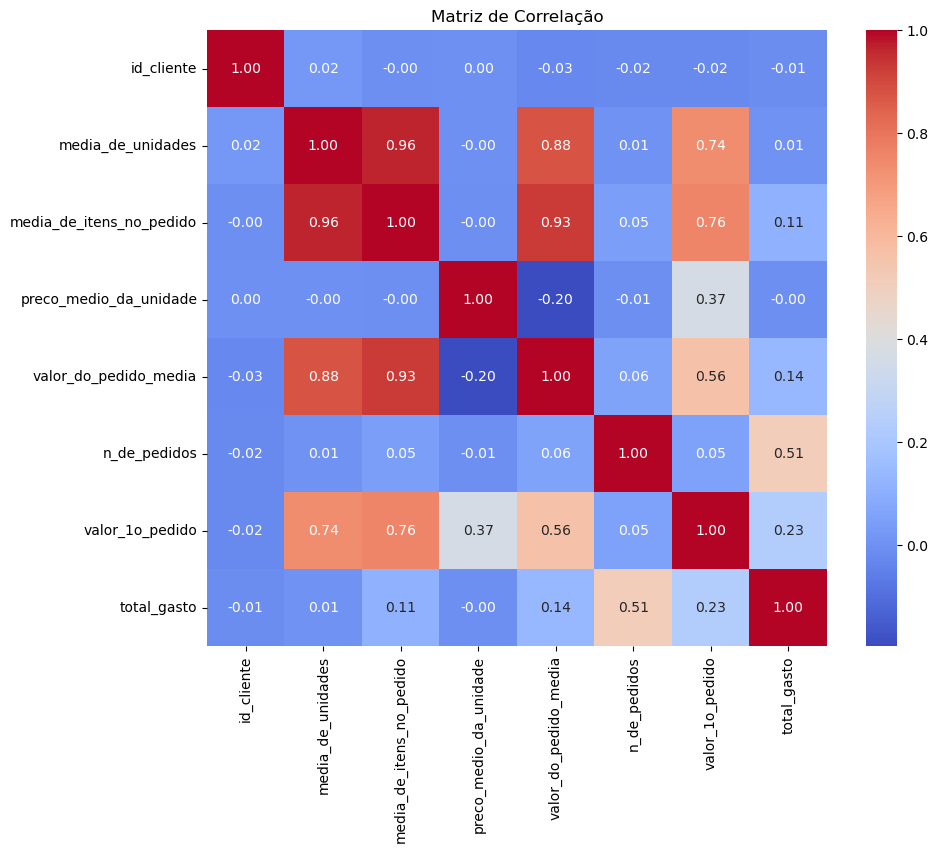

In [67]:
# Calculando a matriz de correlação
matriz_correlacao =  dfgroupbycliente.corr()
# Plotando o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


- Não parece haver correlaçao entre a media de preço unitario do produto comprado e qualquer outra caracteristica.   
- Já a quantidade de items por pedido parece sofrer forte influencia do valor do primeiro pedido, talvez esse tipo de cliente não tem dificuldade em confiar na empresa, por isso compra em grandes quantidades por vez e em valores altos.  
- Mesmo estes clientes não significam que serão os que trarão mais dinheiro para a empresa. 


## separando em grupos <a id='grupos'></a>
- [Sumario](#sumario)    


### padronizando os dados <a id='padrao'></a>

In [68]:
dfclientescaler=dfgroupbycliente.drop(['id_cliente'], axis=1)
#StandardScaler é o responsavel pela padronização
sc=StandardScaler()
clientesc=sc.fit_transform(dfclientescaler)

dfclientesc=pd.DataFrame(clientesc, columns=dfclientescaler.columns)
X=dfclientesc
X

,media_de_unidades,media_de_itens_no_pedido,preco_medio_da_unidade,valor_do_pedido_media,n_de_pedidos,valor_1o_pedido,total_gasto
0,-61.798229,-59.256796,-0.028999,-48.181435,-0.438889,-51.699520,-0.230777
1,0.019565,0.149587,-0.023705,0.235795,0.219634,0.205910,0.291166
2,0.074181,0.506787,-0.017237,0.158745,-0.109627,0.326526,-0.013131
3,0.016647,0.328036,-0.018504,0.869416,-0.438889,0.902750,-0.017937
4,0.019011,-0.017471,-0.019805,-0.014872,-0.438889,-0.045563,-0.190281
...,...,...,...,...,...,...,...
4328,0.013108,-0.138478,-0.016773,-0.110437,-0.438889,-0.148047,-0.208907
4329,0.015785,-0.131313,-0.013958,-0.172437,-0.438889,-0.214535,-0.220990
4330,0.015638,-0.133885,-0.016587,-0.170594,-0.219381,-0.201615,-0.209391
4331,0.010899,-0.081574,-0.027112,-0.118867,1.207419,-0.197390,0.022914


### Aplicar Aprendizado de Maquina nao supervisionado para dividir em grupos, agrupamento KMeans() . <a id='maquina'></a>
- [Sumario](#sumario)

#### dendograma

def grafico_dendograma(df):
    linked = linkage(df, method = 'ward')
    plt.figure(figsize=(20, 20))  
    dendrogram(linked, orientation='top')
    plt.title('dendograma')
    plt.show()
grafico_dendograma(X)   

analizo que 10 grupos serão suficientes, mas poderiamos extender esse numero para 15 ou diminuir para 5.
Mesmo dividindo em 10, suspeito que teremos grupos muito pequenos e outros muito grandes.

#### aplicando o kmeans <a id= 'kmeans'> </a>

In [69]:
km = KMeans(n_clusters = 10,random_state=42) 
grupos = km.fit_predict(clientesc)
dfclientesc['grupo']=grupos
dfclientesc

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,media_de_unidades,media_de_itens_no_pedido,preco_medio_da_unidade,valor_do_pedido_media,n_de_pedidos,valor_1o_pedido,total_gasto,grupo
0,-61.798229,-59.256796,-0.028999,-48.181435,-0.438889,-51.699520,-0.230777,1
1,0.019565,0.149587,-0.023705,0.235795,0.219634,0.205910,0.291166,8
2,0.074181,0.506787,-0.017237,0.158745,-0.109627,0.326526,-0.013131,0
3,0.016647,0.328036,-0.018504,0.869416,-0.438889,0.902750,-0.017937,0
4,0.019011,-0.017471,-0.019805,-0.014872,-0.438889,-0.045563,-0.190281,0
...,...,...,...,...,...,...,...,...
4328,0.013108,-0.138478,-0.016773,-0.110437,-0.438889,-0.148047,-0.208907,0
4329,0.015785,-0.131313,-0.013958,-0.172437,-0.438889,-0.214535,-0.220990,0
4330,0.015638,-0.133885,-0.016587,-0.170594,-0.219381,-0.201615,-0.209391,0
4331,0.010899,-0.081574,-0.027112,-0.118867,1.207419,-0.197390,0.022914,8


#### identificando padroes baseado nos agrupamentos formados pela IA <a id='identificar_padroes'></a>



In [70]:
#transformando os dados para a escala original
sc_inverso=sc.inverse_transform(dfclientesc.drop('grupo',axis=1))
dfgrupo=pd.DataFrame(sc_inverso,
                     columns=dfclientesc.drop('grupo',axis=1).columns)
dfgrupo['grupo']=grupos


In [71]:
def descrever(df):
    todas_colunas=df.columns
    for coluna in todas_colunas:
        print(coluna)
        print(df.groupby('grupo')[coluna].describe().round(1).T)
        print('\n \n')

In [72]:
descrever(dfgrupo)

media_de_unidades
grupo       0        1     2     3      4        5      6     7      8      9
count  3466.0      1.0   1.0   6.0   95.0      1.0   12.0   3.0  683.0   65.0
mean     11.1 -74215.0 -30.5   8.6   16.1 -26997.7   31.9  44.8   13.6   42.5
std      52.7      NaN   NaN   5.9   18.0      NaN   58.5  23.5   22.8   67.8
min   -1802.8 -74215.0 -30.5   2.1    2.0 -26997.7 -113.5  28.6   -0.9  -96.1
25%       5.0 -74215.0 -30.5   3.4    8.5 -26997.7   10.5  31.4    6.6   11.9
50%       9.0 -74215.0 -30.5   8.7   11.8 -26997.7   29.9  34.1   10.0   22.7
75%      13.0 -74215.0 -30.5  13.5   16.4 -26997.7   61.1  52.9   13.9   47.8
max    1756.5 -74215.0 -30.5  15.5  151.1 -26997.7  119.2  71.7  424.6  417.6

 

media_de_itens_no_pedido
grupo       0        1     2      3       4        5       6       7       8  \
count  3466.0      1.0   1.0    6.0    95.0      1.0    12.0     3.0   683.0   
mean    198.2 -74215.0 -30.5  378.1   306.3 -26997.0  1972.8  2417.3   289.0   
std     240

tendencias da divisão: dos quase 4000 usuarios tivemos poucos grupos com mais de 100 usuarios. Não acho que essa divisão vá ser boa para a analize!
vou fazer de novo, mas, dessa vez, vou dividir em 5, 10 e 15 grupos e filtrar ainda mais os dados para remover outliers

In [73]:
dfgroupbycliente.columns

Index(['id_cliente', 'media_de_unidades', 'media_de_itens_no_pedido',
       'preco_medio_da_unidade', 'valor_do_pedido_media', 'n_de_pedidos',
       'valor_1o_pedido', 'total_gasto'],
      dtype='object')

#### filtrando novamente <a id='novamente'></a>
- [Sumario](#sumario)    


In [74]:
dfgroupbyclientef = dfgroupbycliente.copy()

def filtrar(df, parametro, colunadrop):
    colunas = df.drop(colunadrop, axis=1).columns

    percentil95 = []
    percentil99 = []
    for indice, valor in enumerate(colunas):
        percentil95.append(df[valor].quantile(0.95).round())
        percentil99.append(df[valor].quantile(0.99).round())
        print(valor)
        print('percentil95:', percentil95[-1])
        print('percentil99:', percentil99[-1], '\n')

    for indice, valor in enumerate(colunas):
        if parametro == 95:
            percent = 95
            df = df[df[valor] < percentil95[indice]]
        else:
            percent = 99
            df = df[df[valor] < percentil99[indice]]
    print(percent)
    return df

dfgroupbyclientef = filtrar(dfgroupbyclientef, 95, 'id_cliente')

media_de_unidades
percentil95: 33.0
percentil99: 96.0 

media_de_itens_no_pedido
percentil95: 642.0
percentil99: 1354.0 

preco_medio_da_unidade
percentil95: 7.0
percentil99: 15.0 

valor_do_pedido_media
percentil95: 1020.0
percentil99: 2008.0 

n_de_pedidos
percentil95: 16.0
percentil99: 35.0 

valor_1o_pedido
percentil95: 1106.0
percentil99: 2411.0 

total_gasto
percentil95: 5625.0
percentil99: 17660.0 

95


#### padronizando novamente

In [75]:
sc2=StandardScaler()
dflink=pd.DataFrame(sc2.fit_transform(dfgroupbyclientef.drop(['id_cliente'], axis=1)), columns=dfgroupbyclientef.drop(['id_cliente'], axis=1).columns)


In [76]:
#encontrando a matriz não padronizada, para futura análise
dflink_reverso=sc2.inverse_transform(dflink)
dflink_reverso=pd.DataFrame(dflink_reverso,columns=dflink.columns)
dflink_reverso

,media_de_unidades,media_de_itens_no_pedido,preco_medio_da_unidade,valor_do_pedido_media,n_de_pedidos,valor_1o_pedido,total_gasto
0,-74215.000000,-74215.000000,1.040000,-77183.600000,1.0,-77183.60,0.00
1,12.254144,406.845304,2.652873,737.817624,7.0,711.79,4310.00
2,11.588235,197.000000,3.841176,334.400000,1.0,334.40,334.40
3,5.000000,20.000000,6.075000,89.000000,1.0,89.00,89.00
4,18.461538,240.000000,4.203846,459.400000,1.0,459.40,459.40
...,...,...,...,...,...,...,...
3502,7.444444,60.333333,4.208889,96.698889,2.0,110.38,97.63
3503,7.333333,66.000000,3.283333,173.900000,1.0,173.90,173.90
3504,4.500000,45.000000,4.765000,180.600000,1.0,180.60,180.60
3505,7.714286,54.000000,5.622857,80.820000,1.0,80.82,80.82


#### dividindo em grupos pelo kmenans novamente <a id='kmeans2'></a>

ao revisor: faz sentido eu dividir sem levar em conta o total gasto? ja que essa seria em teoria a minha variavel objetivo?

In [77]:
#dividindo em 10 grupos:
km10 = KMeans(n_clusters = 10,random_state=30,n_init=10) 
grupos10 = km10.fit_predict(dflink)


dflink10=dflink_reverso.copy()
dflink10['grupo']=grupos10

In [78]:
#dividindo em 5 grupos:
km5 = KMeans(n_clusters = 5,random_state=30) 
grupos5 = km5.fit_predict(dflink)

dflink5=dflink_reverso.copy()
dflink5['grupo']=grupos5

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [79]:
#dividindo em 15 grupos, sem levar a coluna objetivo em conta
km15 = KMeans(n_clusters = 15,random_state=30) 
grupos15= km15.fit_predict(dflink.drop('total_gasto',axis=1))

dflink15=dflink_reverso.copy()
dflink15['grupo']=grupos15

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [80]:
#vejamos os dados de cada df resultante
#5grupos
descrever(dflink5)

media_de_unidades
grupo       0        1      2        3      4
count  1920.0      1.0  902.0      1.0  683.0
mean      8.8 -74215.0    7.8 -26997.7   10.2
std      34.8      NaN    5.3      NaN    6.3
min   -1350.0 -74215.0  -48.8 -26997.7  -67.2
25%       4.5 -74215.0    5.0 -26997.7    6.3
50%       9.5 -74215.0    7.5 -26997.7    9.6
75%      13.1 -74215.0    9.7 -26997.7   12.7
max      32.9 -74215.0   32.0 -26997.7   31.7

 

media_de_itens_no_pedido
grupo       0        1      2        3      4
count  1920.0      1.0  902.0      1.0  683.0
mean    190.8 -74215.0  123.5 -26997.0  256.0
std     129.6      NaN   92.1      NaN  123.9
min   -1350.0 -74215.0 -267.2 -26997.0 -192.0
25%      99.7 -74215.0   56.0 -26997.0  162.7
50%     164.1 -74215.0  105.0 -26997.0  239.4
75%     261.2 -74215.0  168.0 -26997.0  336.7
max     639.0 -74215.0  593.0 -26997.0  639.4

 

preco_medio_da_unidade
grupo       0    1      2    3      4
count  1920.0  1.0  902.0  1.0  683.0
mean      2.4  1.0    

a divisão ficou relativamente boa

#10grupos
descrever(dflink10)

aqui temos mais grupos para analisar

print('dflink5')
descrever(dflink15)

com 15 encontramos os grupos bem divididos. Mas talvez em razão da alta quantidade, isso acabe por dificultar a analise

In [81]:
def gruposanalise(df):
    dfg=df.groupby('grupo').mean().reset_index()
    dfg.loc[:,:] = dfg.loc[:,:].round(2)
    return dfg
    

In [82]:
dflink5gruped=gruposanalise(dflink5)

o grupo 1 e o grupo 4 sõa de clientes com muitas devoluções e em reduzido numero.


In [83]:
dflink5gruped.drop([1,4], axis=0)

,grupo,media_de_unidades,media_de_itens_no_pedido,preco_medio_da_unidade,valor_do_pedido_media,n_de_pedidos,valor_1o_pedido,total_gasto
0,0,8.78,190.79,2.42,281.11,2.26,275.71,521.78
2,2,7.76,123.50,4.63,292.16,2.51,290.33,540.36
3,3,-26997.67,-26997.00,1.66,-56154.60,2.00,2.90,2.90


In [84]:
dflink5.groupby('grupo').sum().round()

,media_de_unidades,media_de_itens_no_pedido,preco_medio_da_unidade,valor_do_pedido_media,n_de_pedidos,valor_1o_pedido,total_gasto
grupo,,,,,,,
0,16852.0,366309.0,4637.0,539725.0,4346.0,529361.0,1001813.0
1,-74215.0,-74215.0,1.0,-77184.0,1.0,-77184.0,0.0
2,6997.0,111396.0,4180.0,263531.0,2266.0,261880.0,487406.0
3,-26998.0,-26997.0,2.0,-56155.0,2.0,3.0,3.0
4,6944.0,174832.0,2062.0,295329.0,5828.0,287637.0,1651703.0


o primeiro grupo compra mais unidades com preços medios e faz muitos pedidos. são os mais rentaveis, mesmo sendo minoria.    
o segundo compra itens mais baratos e compra menos vezes.  Cada cliente não é tão rentavel, mas a soma deles é.  
o terceiro compra menos produtos, que são mais caros, mas compra poucas vezes.  Não são tão rentaveis.  

vamos analizar a divizao de 10 

In [85]:
gruposanalise(dflink10)

,grupo,media_de_unidades,media_de_itens_no_pedido,preco_medio_da_unidade,valor_do_pedido_media,n_de_pedidos,valor_1o_pedido,total_gasto
0,0,10.19,238.14,2.49,354.59,4.65,345.88,1136.88
1,1,-74215.00,-74215.00,1.04,-77183.60,1.00,-77183.60,0.00
2,2,8.36,151.85,3.39,292.06,1.68,290.40,403.27
3,3,-26997.67,-26997.00,1.66,-56154.60,2.00,2.90,2.90
4,4,11.65,299.44,3.07,508.15,11.85,489.89,4020.20
5,5,7.13,95.66,5.47,266.19,1.81,267.13,390.30
6,6,8.21,188.58,1.94,241.01,1.65,236.97,336.25
7,7,8.73,186.06,3.06,304.23,10.75,284.57,2065.11
8,8,8.41,140.71,4.28,317.05,5.23,309.56,1037.08
9,9,11.08,328.48,2.97,567.06,6.22,557.20,2571.39


##### Como ficou a divisao dos dados? <a id='divisao'></a>


Os grupos que mais fizeram devoluções  (3 e o 4) são de clientes unicos
dos grupos com muitos pedidos, (0 e 7) temos um com muitos produtos e outro na media, ambos são rentaveis
dos grupos com poucos pedidos,(1, 8  e 9) 
temos um grupo que compra produtos bem mais baratos, 
outro que compra menos itens por pedido
outro que é bem mediano
Todos tem uma rentabilidade relativamente baixa
Do  restante (2,5 e 6)temos
que o 2 compra muitos itens por pedidos e faz mais pedidos isso faz dele bem rentavel
os demais , 5 e 6 são semelhantemente rentaveis por pessoa, mas o 6 compra menos itens mais caros e o 5 mais itens mais baratos


os melhores grupos são os que fazem muitos pedidos, independente do tipo de produto que compram(mais caro/mais barato) 
o grupo 5 tem muitos membros, ele compra muitos itens baratos e faz um numero medio de produtos. Esse grupo pode ser o foco de propagandas publicas enquanto que o outro pode ser o foco de mala direta, promoções e politicas de pós-venda.

## Conclusoes finais <a id='conclusoes_finais'></a>
- [Sumario](#sumario)

Temos muitos produtos de baixo valor sendo vendido em grandes quantidades. 
Além disso temos pedidos com diversos produtos diferentes, o que eleva consideravelmente o valor medio dos pedidos.  
Os clientes fazem compras com certa frequencia ( uma media proxima a 4 compras por ano).  
Os clientes mais rentaveis são os que fazem muitas compras.
Muitos clientes começaram a comprar a partir de uma primeira compra de 300 dolares (se foi uma promoção ela foi bem sucedida).
Do meio do ano pra frente as compras crescem, sendo o final do ano, o periodo com mais vendas e mais faturamento, com destaque para novembro.

Os valores são menos relevantes que a quantidade de produtos. Grande parcela da clientela tem poucas compras  e em baixo valor. 




link tableau:
https://public.tableau.com/app/profile/andre.camara/viz/apresentacao2/Painel1?publish=yes

link apresentação power point:
https://docs.google.com/presentation/d/1iW_eLEp_r9oabcHqr_caHb-sK0E6On4C/edit?usp=sharing&ouid=102661592568944548297&rtpof=true&sd=true